<a href="https://colab.research.google.com/github/2303a52209/AIML/blob/main/AIML_LAB_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.datasets import fetch_openml

data = fetch_openml(name='diabetes_dataset', version=2, parser='auto')

In [6]:
type(data)

sklearn.utils._bunch.Bunch

In [7]:
data.details

{'id': '46254',
 'name': 'Diabetes_Dataset',
 'version': '2',
 'description_version': '1',
 'format': 'arff',
 'creator': 'Pima Indians',
 'contributor': 'None',
 'collection_date': '01-01-2024',
 'upload_date': '2024-06-30T18:03:21',
 'language': 'English',
 'licence': 'Public Domain (CC0)',
 'url': 'https://api.openml.org/data/v1/download/22120718/Diabetes_Dataset.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0004/46254/dataset_46254.pq',
 'file_id': '22120718',
 'citation': 'https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset',
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0004/46254/dataset_46254.pq',
 'status': 'active',
 'processing_date': '2024-06-30 18:04:15',
 'md5_checksum': 'eb3f2c457072a0e82f914d394b8aafcb'}

In [8]:
data.details['version']

'2'

In [9]:
print(data.DESCR)

Description:
The dataset, named 'diabetes.csv', serves as a comprehensive resource for understanding various factors that may influence the occurrence of diabetes in individuals. Consisting of several medically relevant parameters, the dataset captures key details across 9 columns, namely Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI (Body Mass Index), DiabetesPedigreeFunction, Age, and Outcome. Each column reflects a distinct attribute significant to diabetes research and potential predictive modeling.

Attribute Description:
1. Pregnancies: Number of times pregnant (Example values: 2, 1)
2. Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test (Example values: 82, 142)
3. BloodPressure: Diastolic blood pressure (mm Hg) (Example values: 70, 64)
4. SkinThickness: Triceps skin fold thickness (mm) (Example values: 27, 0)
5. Insulin: 2-Hour serum insulin (mu U/ml) (Example values: 168, 0)
6. BMI: Body mass index (weight in kg/(height in m)

In [10]:
data.feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [11]:
data = data.frame
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [12]:
type(data)

pandas.core.frame.DataFrame

In [14]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.3,
random_state=20)

print('The size of training data is: {}\nThe size of testing data is: {}'.format(len(train_data),
                                        len(test_data)))

The size of training data is: 537
The size of testing data is: 231


In [15]:
train_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,3.903166,121.536313,69.132216,20.296089,81.491620,31.685289,0.472203,33.251397,0.353818
std,3.336525,31.458796,18.291973,15.779966,117.897978,7.593233,0.329960,11.848945,0.478599
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.240000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,144.000000,80.000000,32.000000,126.000000,36.300000,0.637000,41.000000,1.000000
max,17.000000,199.000000,110.000000,99.000000,744.000000,55.000000,2.329000,81.000000,1.000000


In [16]:
train_data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [17]:
train_data['Pregnancies'].value_counts()

,count
Pregnancies,
1.0,87
2.0,87
0.0,67
3.0,54
4.0,52
6.0,38
5.0,34
7.0,34
8.0,27


In [18]:
train_data['Glucose'].value_counts()

,count
Glucose,
99.0,14
100.0,14
125.0,12
111.0,11
95.0,10
...,...
82.0,1
198.0,1
86.0,1


In [19]:
train_data['BloodPressure'].value_counts()

,count
BloodPressure,
70.0,43
74.0,37
68.0,33
72.0,32
80.0,31
64.0,29
60.0,29
76.0,27
78.0,25


In [21]:
train_data['SkinThickness'].value_counts()

,count
SkinThickness,
0.0,161
32.0,27
30.0,23
27.0,17
31.0,16
18.0,16
33.0,14
37.0,14
28.0,14


In [22]:
train_data['Insulin'].value_counts()

,count
Insulin,
0.0,263
105.0,8
140.0,6
100.0,5
135.0,5
...,...
79.0,1
58.0,1
225.0,1


In [23]:
train_data['BMI'].value_counts()

,count
BMI,
31.6,9
32.4,9
32.8,8
31.2,8
0.0,8
...,...
19.9,1
26.9,1
45.2,1


In [25]:
train_data['DiabetesPedigreeFunction'].value_counts()

,count
DiabetesPedigreeFunction,
0.259,5
0.268,4
0.167,4
0.294,3
0.520,3
...,...
0.646,1
0.831,1
1.034,1


In [26]:
train_data['Age'].value_counts()

,count
Age,
22.0,50
21.0,42
24.0,34
25.0,30
23.0,30
28.0,27
27.0,22
26.0,22
29.0,20


In [27]:
train_data['Outcome'].value_counts()

,count
Outcome,
0.0,347
1.0,190


<Axes: xlabel='Pregnancies', ylabel='count'>

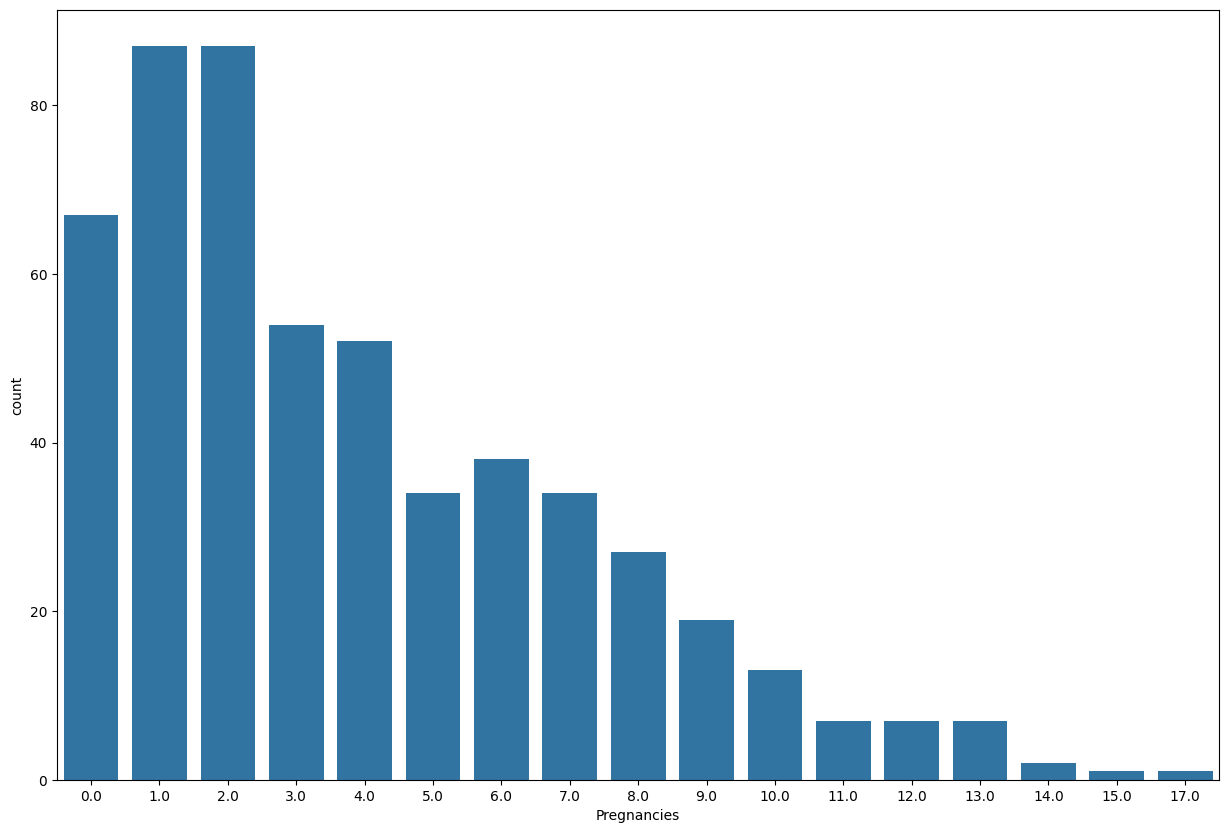

In [29]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='Pregnancies')

<Axes: xlabel='Glucose', ylabel='count'>

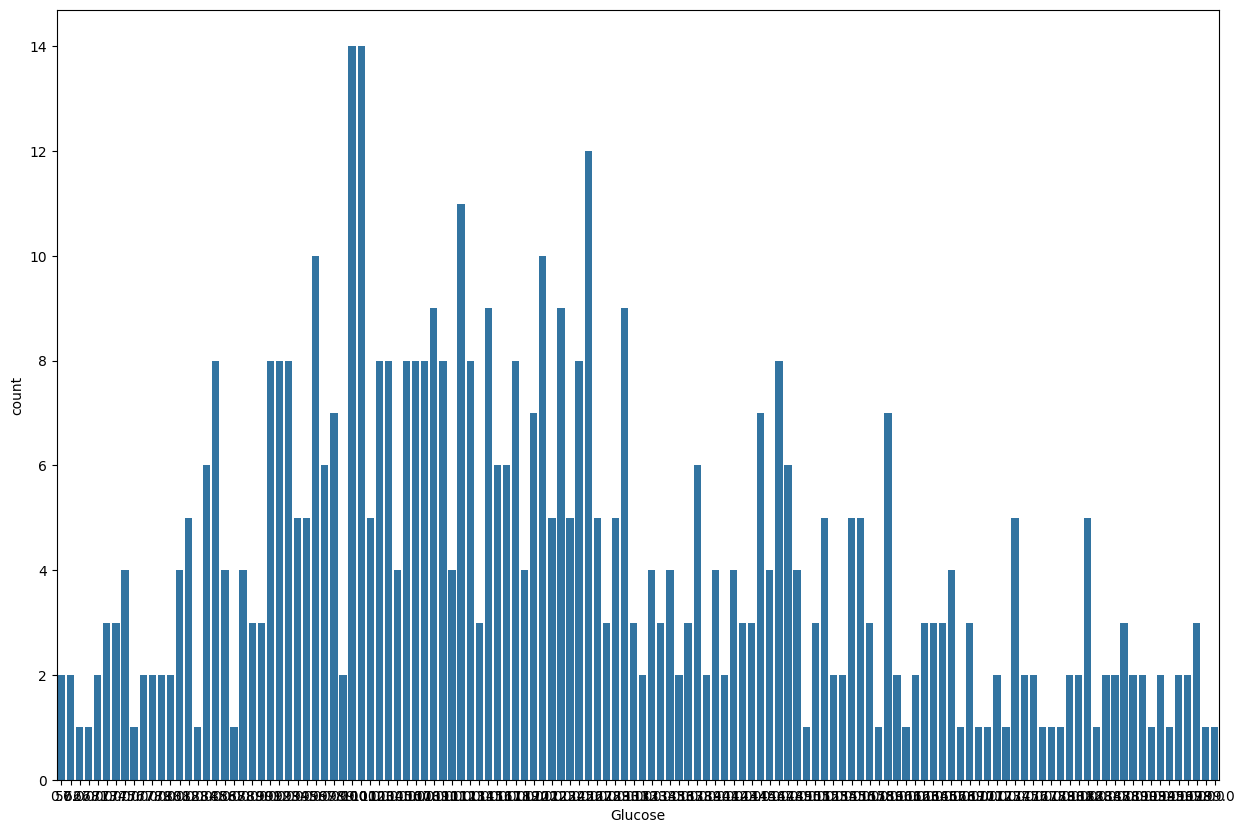

In [30]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='Glucose')

<Axes: xlabel='BloodPressure', ylabel='count'>

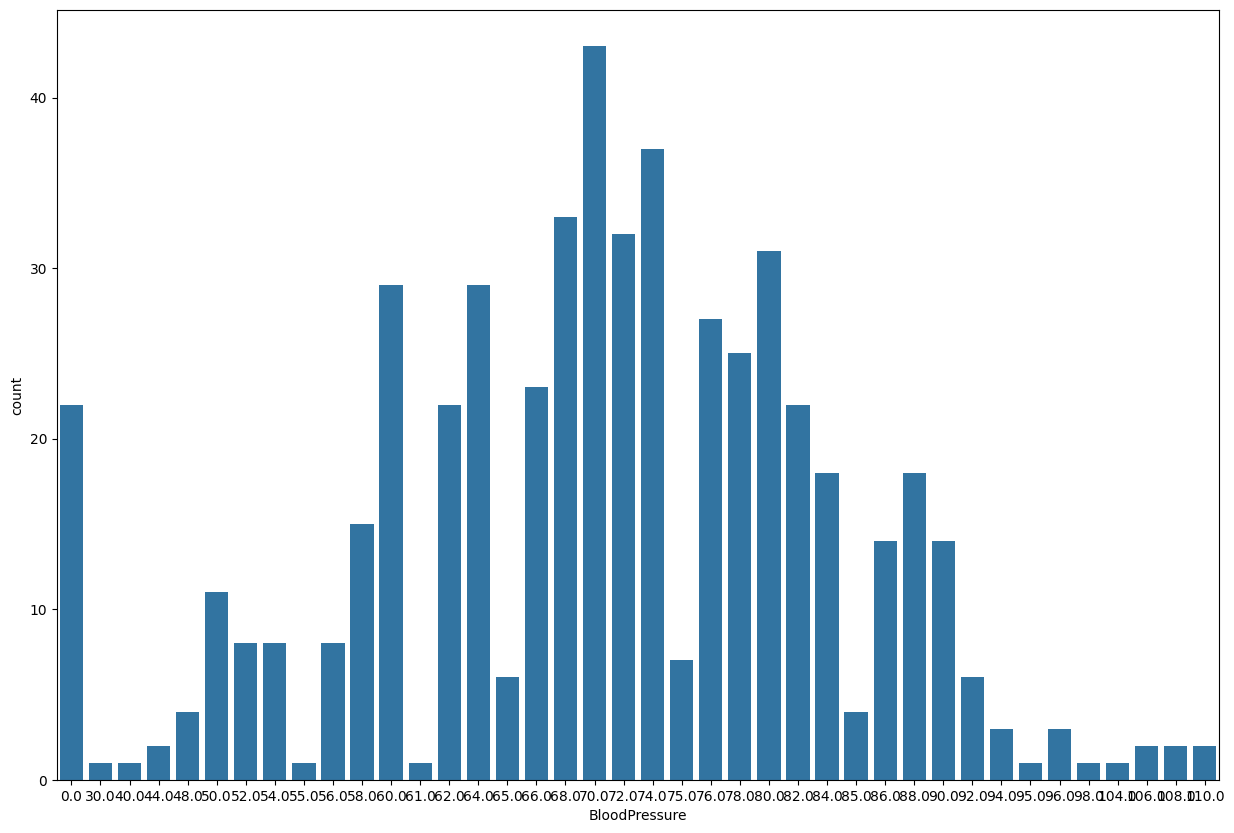

In [31]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='BloodPressure')

<Axes: xlabel='SkinThickness', ylabel='count'>

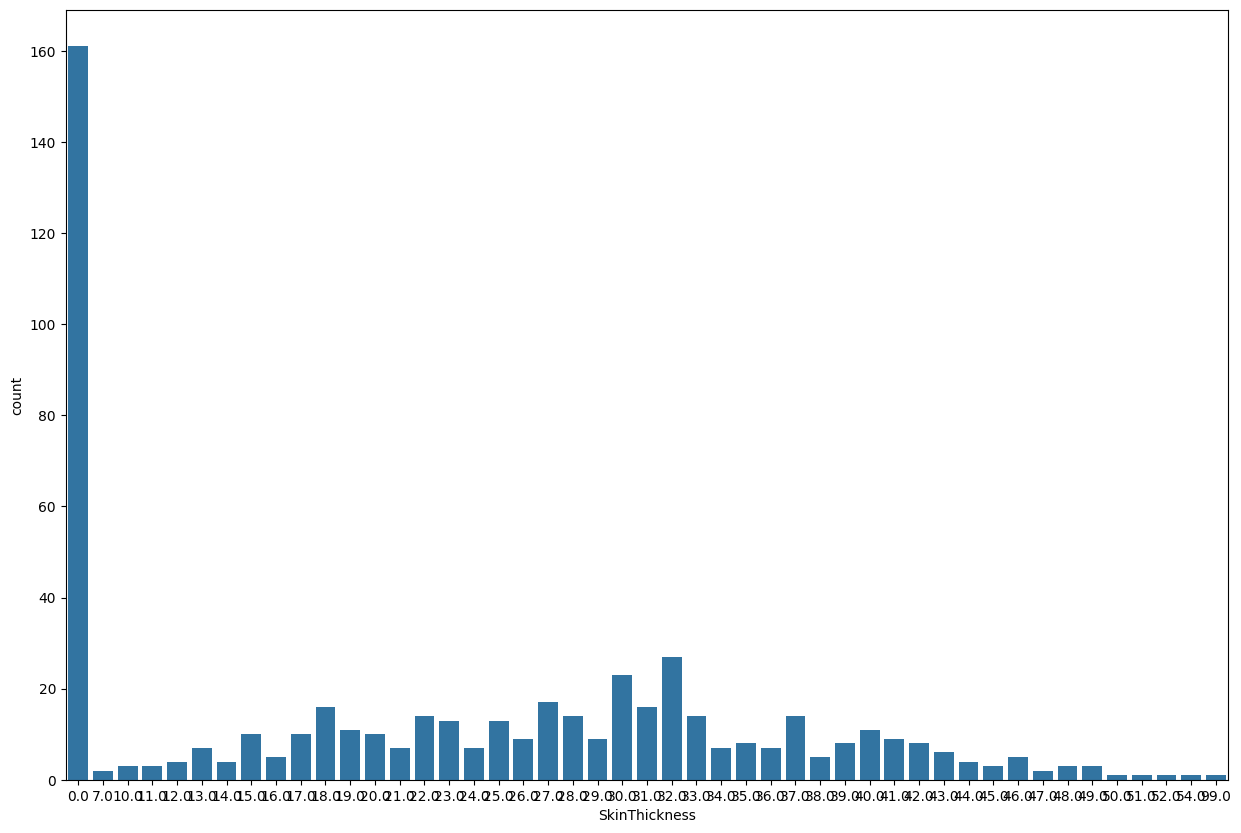

In [32]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='SkinThickness')

<Axes: xlabel='Insulin', ylabel='count'>

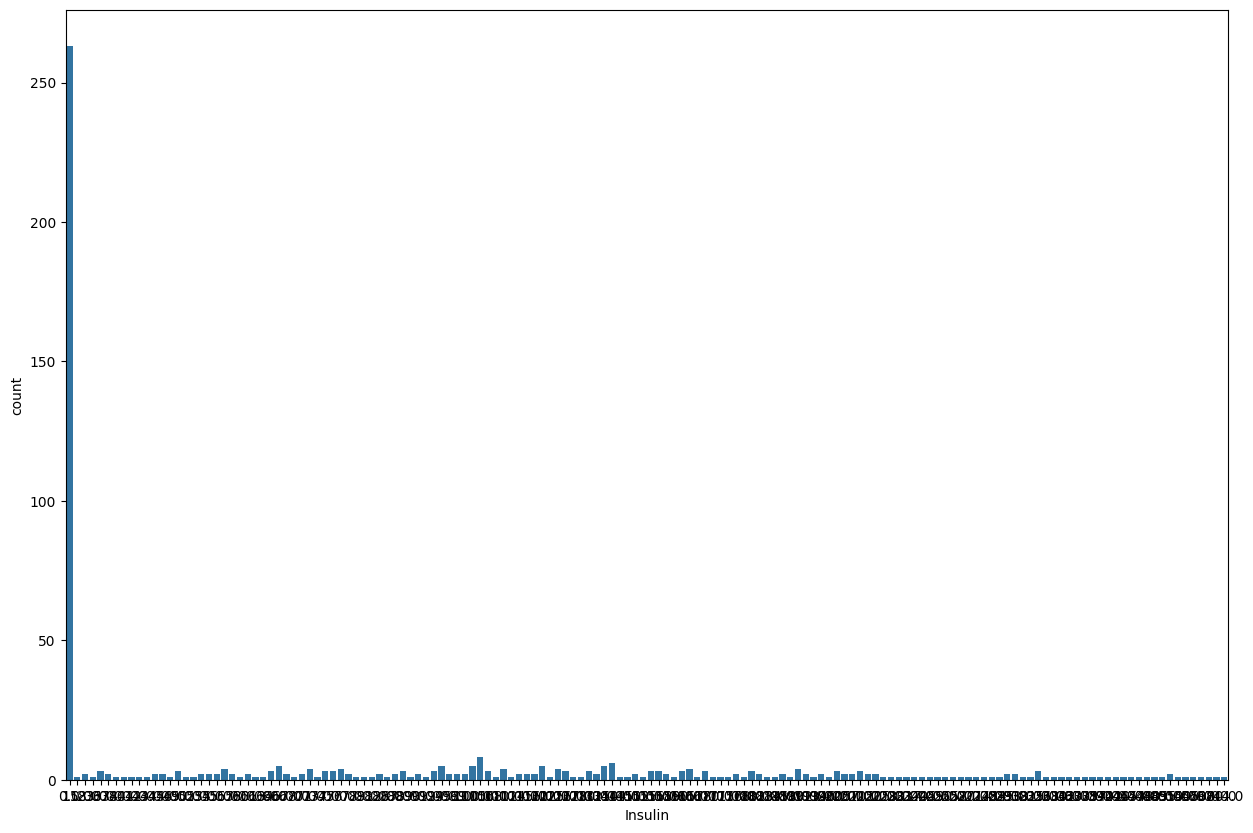

In [33]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='Insulin')

<Axes: xlabel='BMI', ylabel='count'>

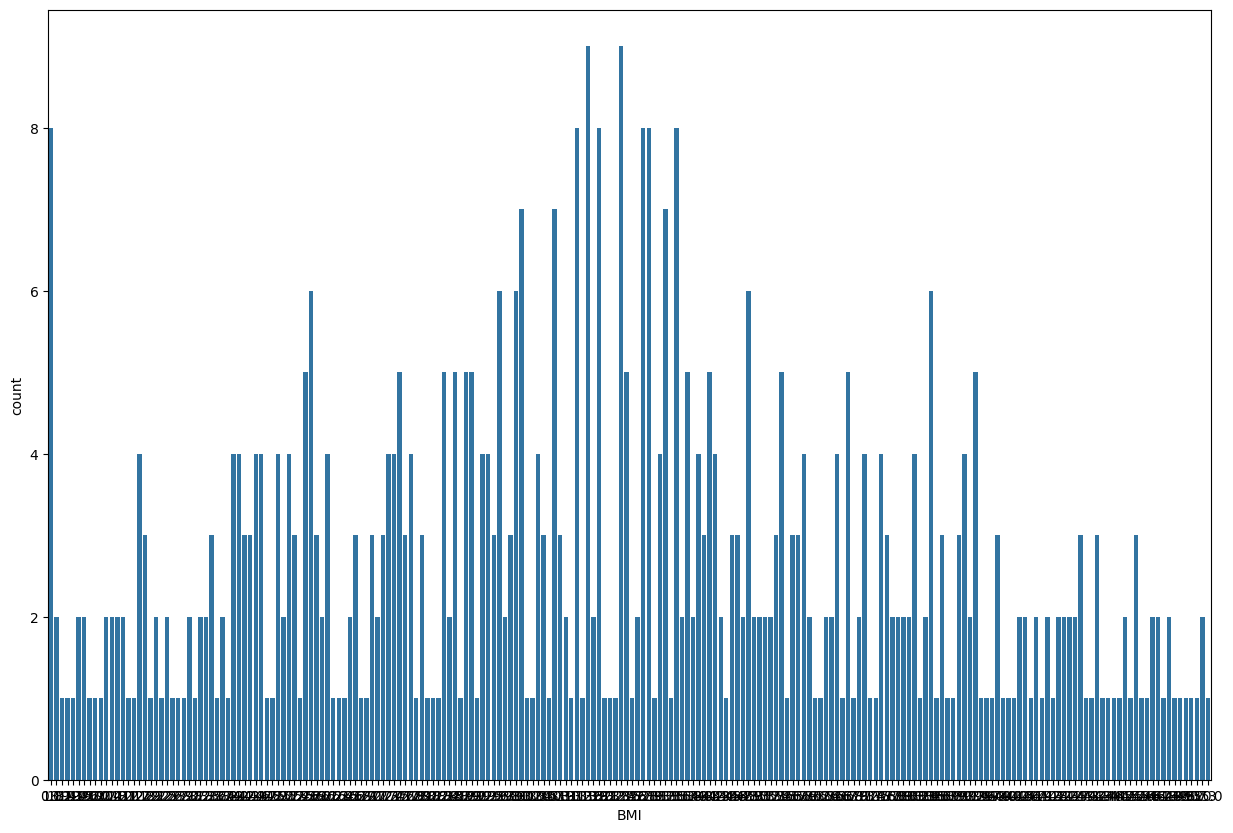

In [34]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='BMI')

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='count'>

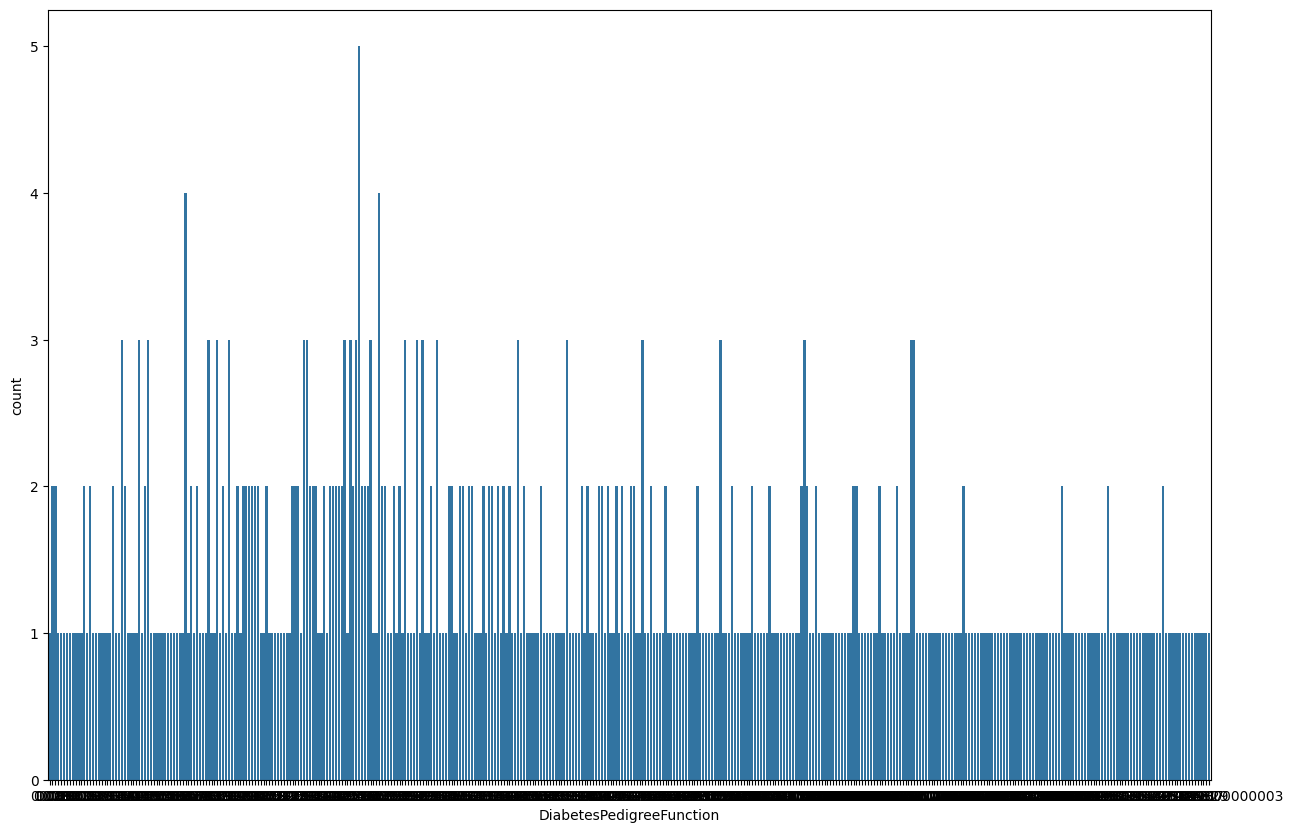

In [35]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='DiabetesPedigreeFunction')

<Axes: xlabel='Age', ylabel='count'>

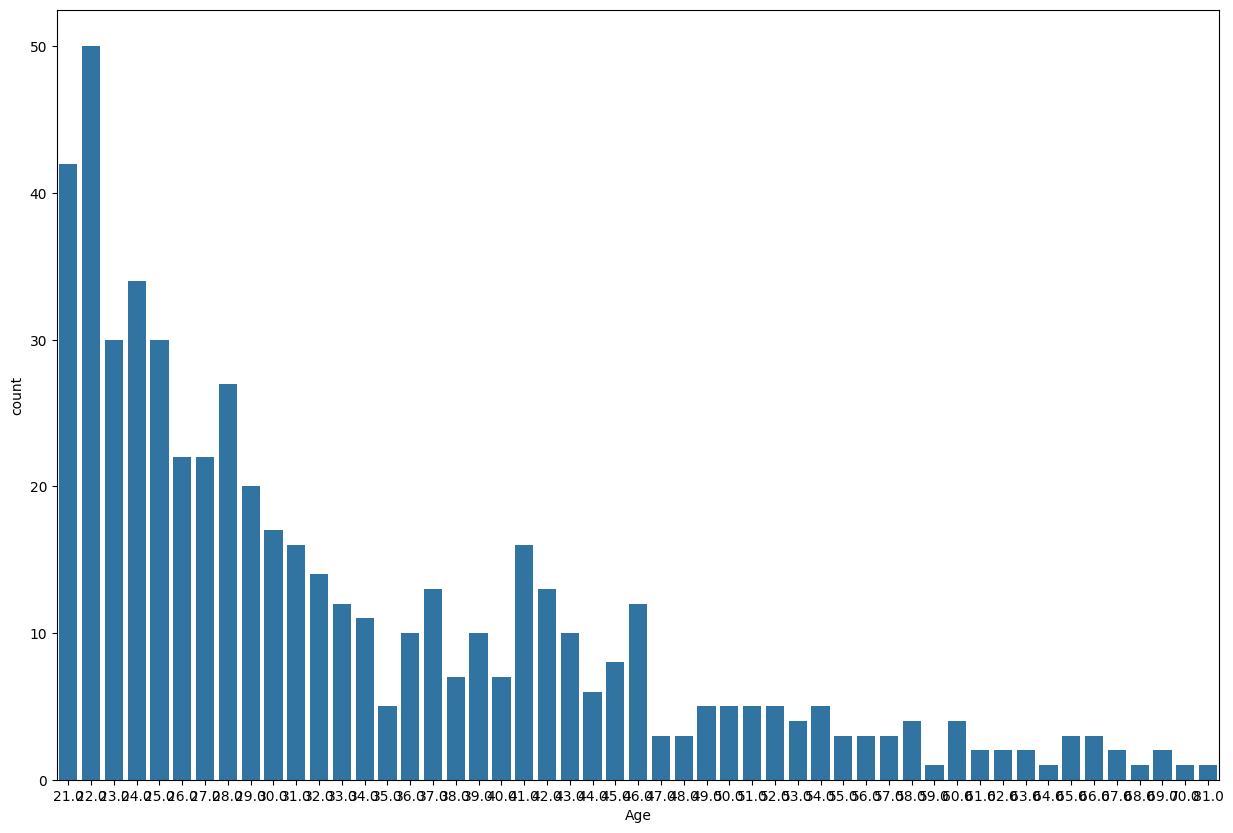

In [36]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='Age')

<Axes: xlabel='Outcome', ylabel='count'>

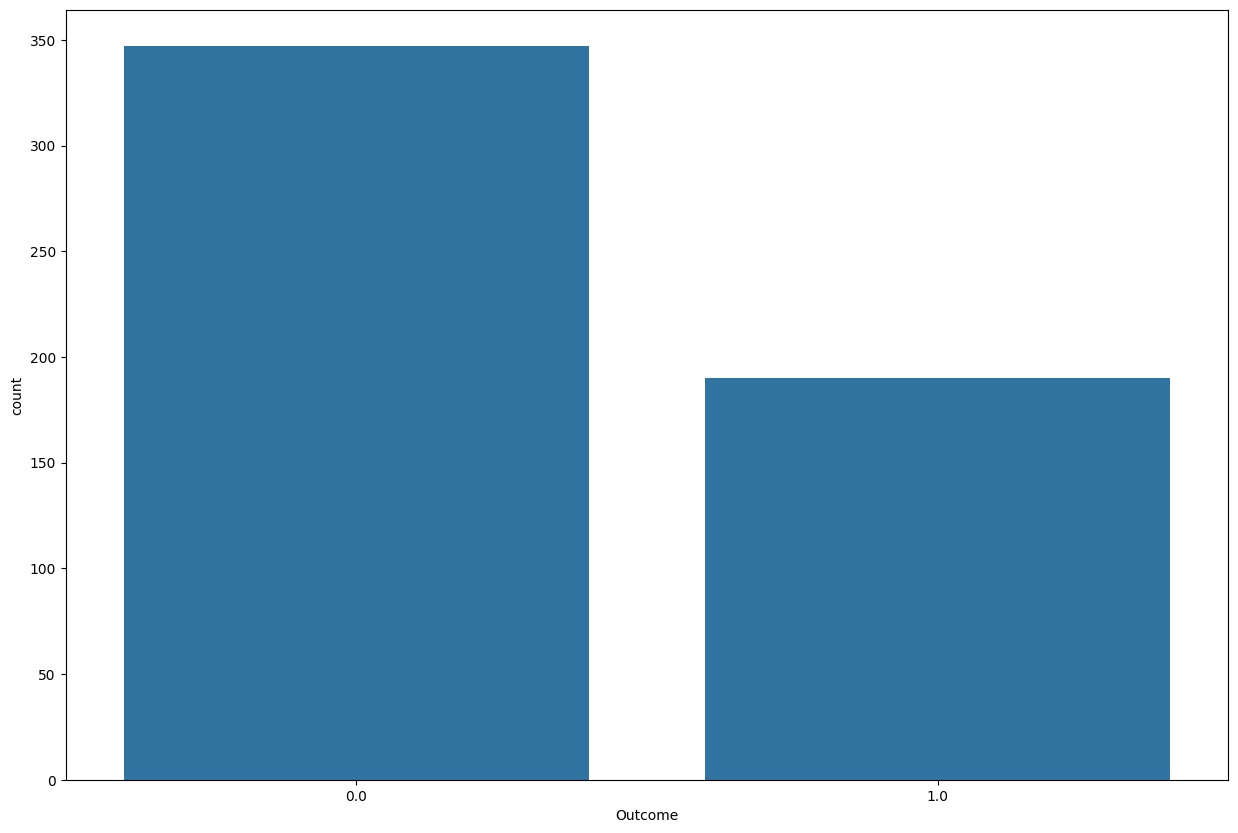

In [37]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='Outcome')

In [39]:
train = train_data.drop('Age', axis=1)
labels = train_data[['Age']]

In [43]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
pipe = Pipeline([('ord_enc', OrdinalEncoder())])
train_prepared = pipe.fit_transform(train)

<Axes: xlabel='Age', ylabel='count'>

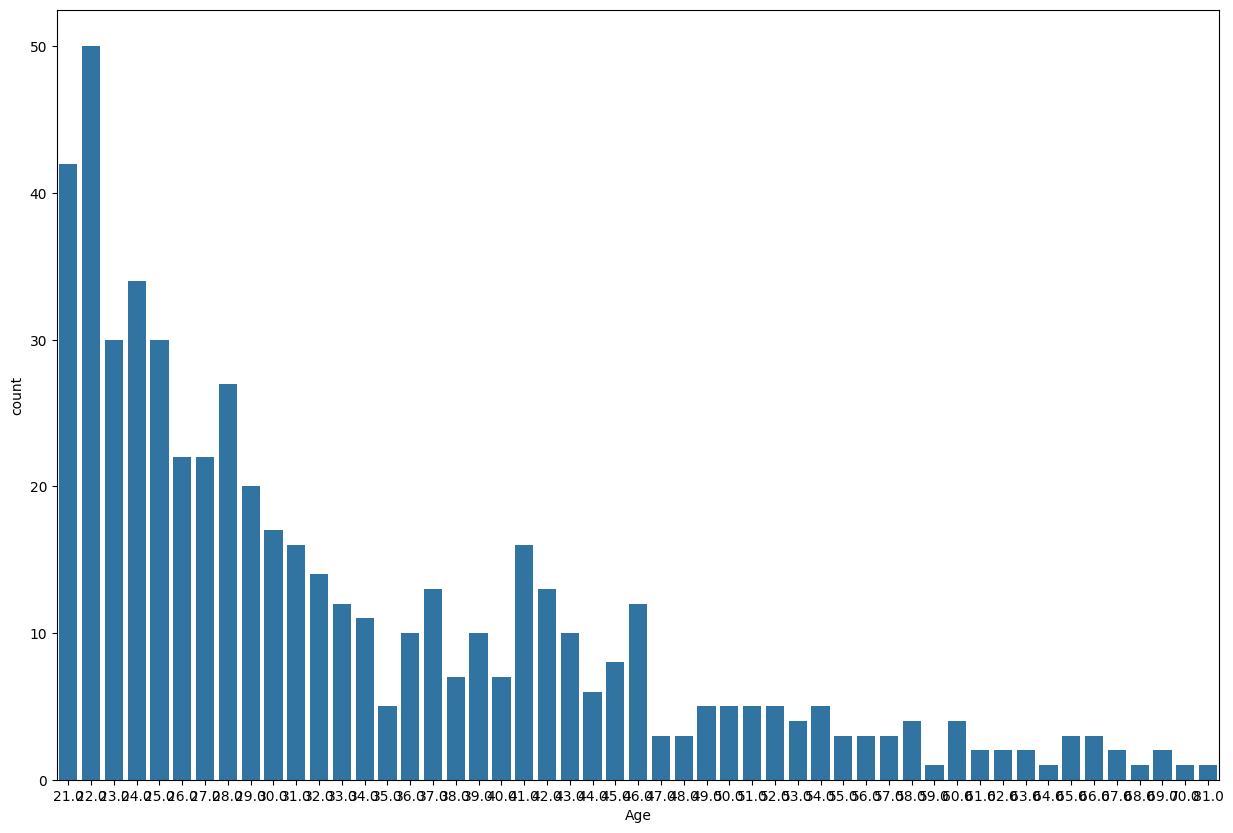

In [42]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='Age')

In [44]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
labels_prepared = label_enc.fit_transform(labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(train_prepared,labels_prepared)

DecisionTreeClassifier()

In [47]:
from sklearn.tree import DecisionTreeClassifier, export_text
tree_clf = DecisionTreeClassifier()
tree_clf.fit(train_prepared,labels_prepared)

text_representation = export_text(tree_clf)
print(text_representation)

|--- feature_0 <= 3.50
|   |--- feature_5 <= 88.50
|   |   |--- feature_1 <= 14.50
|   |   |   |--- feature_6 <= 290.00
|   |   |   |   |--- feature_6 <= 51.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_6 >  51.50
|   |   |   |   |   |--- feature_2 <= 19.50
|   |   |   |   |   |   |--- feature_1 <= 11.00
|   |   |   |   |   |   |   |--- feature_1 <= 7.50
|   |   |   |   |   |   |   |   |--- feature_6 <= 101.50
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 11.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_2 >  11.50
|   |   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |   |--- feature_6 >  101.50
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 2.00
|   |   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |   |   |--- feature_2 >  2.00
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |-

In [48]:
from sklearn.metrics import accuracy_score

def accuracy(input_data,model,labels):
    """
    Take the input data, model and labels and
    return accuracy
    """
    preds = model.predict(input_data)
    acc = accuracy_score(labels,preds)
    return acc

In [49]:
from sklearn.metrics import confusion_matrix

def conf_matrix(input_data,model,labels):
    """
    Take the input data, model and labels and return confusion matrix
    """
    preds = model.predict(input_data)
    cm = confusion_matrix(labels,preds)

    return cm

In [50]:
from sklearn.metrics import classification_report

def class_report(input_data,model,labels):
    """
    Take the input data, model and labels and return classification report
    """
    preds = model.predict(input_data)
    report = classification_report(labels,preds)
    report = print(report)

    return report

In [51]:
accuracy(train_prepared, tree_clf,labels_prepared)

1.0

In [52]:
conf_matrix(train_prepared, tree_clf,labels_prepared)

array([[42,  0,  0, ...,  0,  0,  0],
       [ 0, 50,  0, ...,  0,  0,  0],
       [ 0,  0, 30, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  2,  0,  0],
       [ 0,  0,  0, ...,  0,  1,  0],
       [ 0,  0,  0, ...,  0,  0,  1]])

In [54]:
class_report(train_prepared, tree_clf,labels_prepared)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        16
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        13
          17       1.00    

In [55]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
from sklearn.model_selection import GridSearchCV

params_grid = {'max_leaf_nodes': list(range(0, 10)),
               'min_samples_split': [0,1,2, 3, 4],
               'min_samples_leaf': [0,1,2, 3, 4],
               'max_depth':[0,1,2,3,4,5],
               'max_features':[0,1,2,3,4,5],
              'max_leaf_nodes':[0,1,2,3,4,5]}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'), params_grid, verbose=1, cv=3, refit=True)
grid_search.fit(train_prepared, labels_prepared)

Fitting 3 folds for each of 5400 candidates, totalling 16200 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5],
                         'max_features': [0, 1, 2, 3, 4, 5],
                         'max_leaf_nodes': [0, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [0, 1, 2, 3, 4],
                         'min_samples_split': [0, 1, 2, 3, 4]},
             verbose=1)

In [58]:
grid_search.best_params_

{'max_depth': 1,
 'max_features': 5,
 'max_leaf_nodes': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [59]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=1, max_features=5,
                       max_leaf_nodes=2, random_state=42)

In [61]:
tree_best = grid_search.best_estimator_

In [62]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

[ 68.  58.  66.  74.  52.  72.  76.  80.   0.  75.  82.  78.  62.  84.
  70.  50.  60.  88.  92.  64.  90.  54.  96.  86.  65. 104. 108.  85.
  48.  56.  94.  98.  95.  40. 106.  44.  30. 110.  55.  61.]


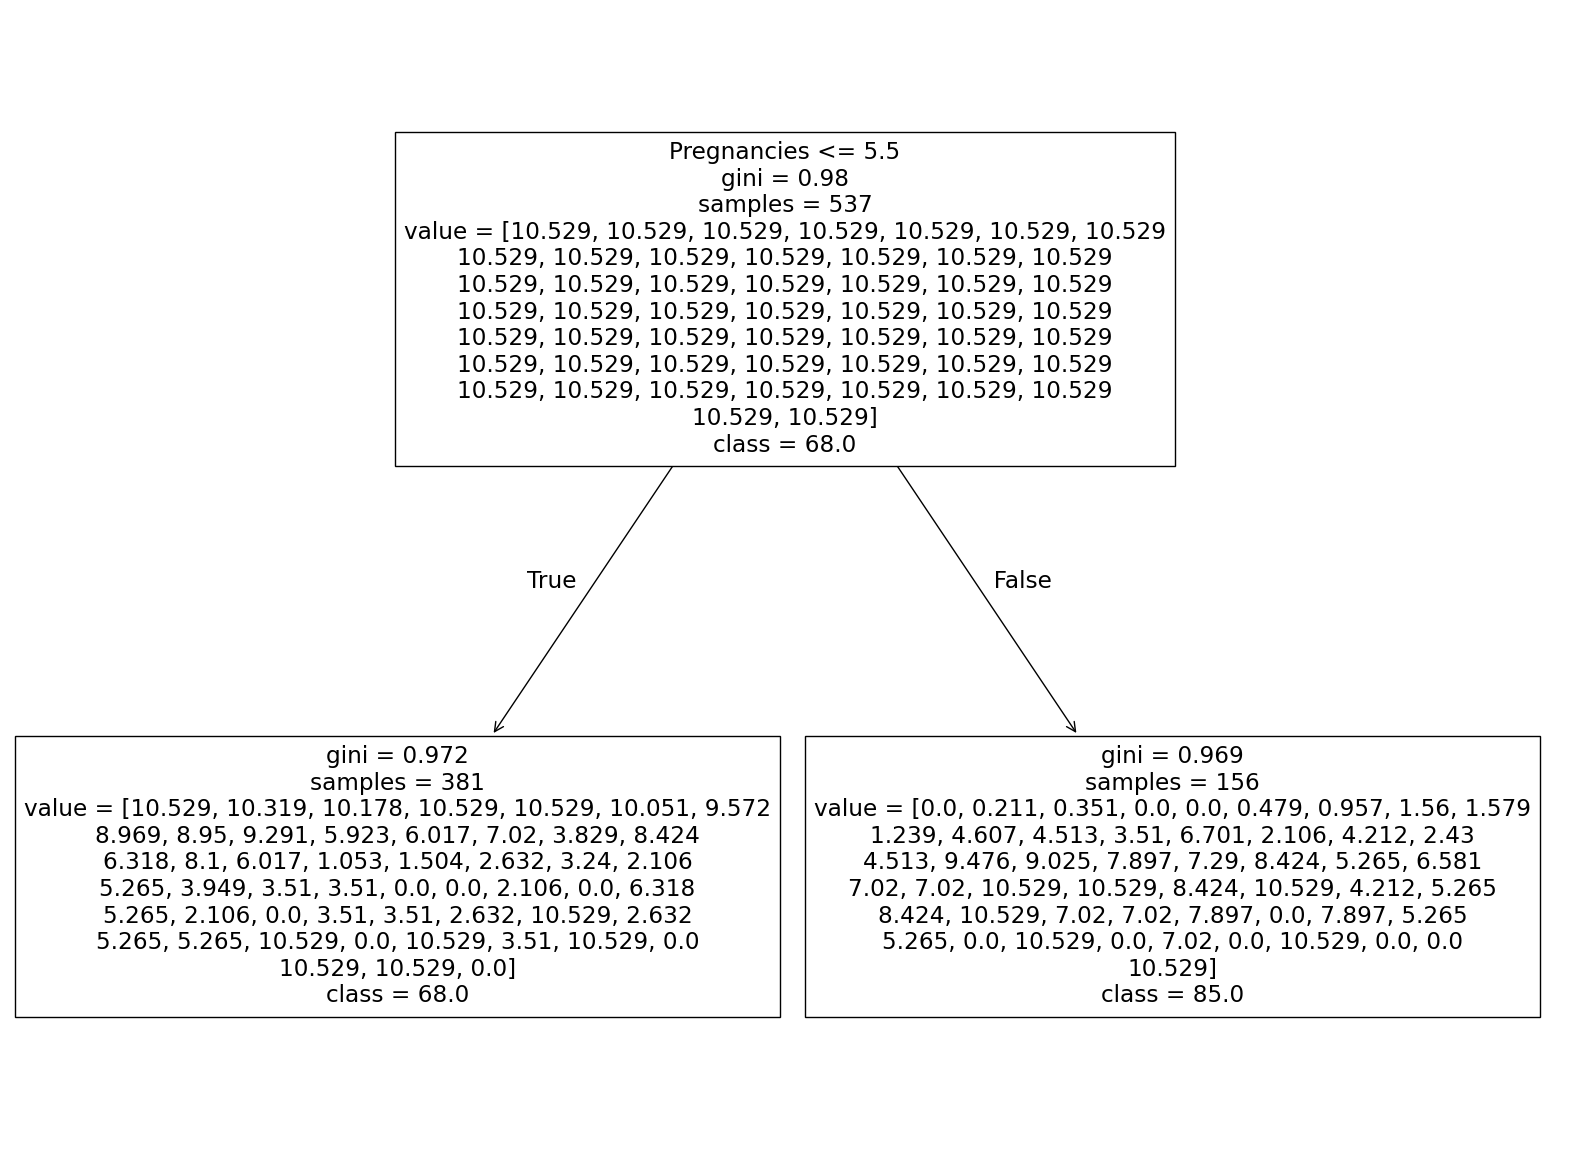

In [66]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
print(train['BloodPressure'].unique())
class_names = [str(x) for x in train['BloodPressure'].unique().tolist()]
plot_tree(tree_best, feature_names=train.columns, class_names=class_names);

In [67]:
accuracy(train_prepared, tree_best,labels_prepared)

0.08379888268156424

In [68]:
class_report(train_prepared, tree_best,labels_prepared)

              precision    recall  f1-score   support

           0       0.11      1.00      0.20        42
           1       0.00      0.00      0.00        50
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00        34
           4       0.00      0.00      0.00        30
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00        22
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00        17
          10       0.00      0.00      0.00        16
          11       0.00      0.00      0.00        14
          12       0.00      0.00      0.00        12
          13       0.00      0.00      0.00        11
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00        10
          16       0.00      0.00      0.00        13
          17       0.00    

In [69]:
test = test_data.drop('Age', axis=1)
test_labels = test_data['Age']

In [71]:
!pip install scikit-learn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

pipe = Pipeline(steps=[
    ('ord_enc', OrdinalEncoder(handle_unknown='Pregnancies', unknown_value=-1))

])

In [74]:
!pip install scikit-learn --upgrade
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
test_labels_prepared = label_enc.fit_transform(test_labels)

In [85]:
!pip install scikit-learn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

pipe = Pipeline(steps=[
    ('ord_enc', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

])

test_prepared = pipe.fit_transform(test)
conf_matrix(test_prepared, tree_best, test_labels_prepared)

array([[21,  0,  0, ...,  0,  0,  0],
       [22,  0,  0, ...,  0,  0,  0],
       [ 8,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0]])

In [86]:
class_report(test_prepared, tree_best,test_labels_prepared)

              precision    recall  f1-score   support

           0       0.12      1.00      0.22        21
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         6
          16       0.00      0.00      0.00         6
          17       0.00    